## 离散型随机变量

### 二项分布和二项随机变量

#### 画简单的二项分布PMF图

In [2]:
from scipy.stats import binom
import matplotlib.pyplot as plt

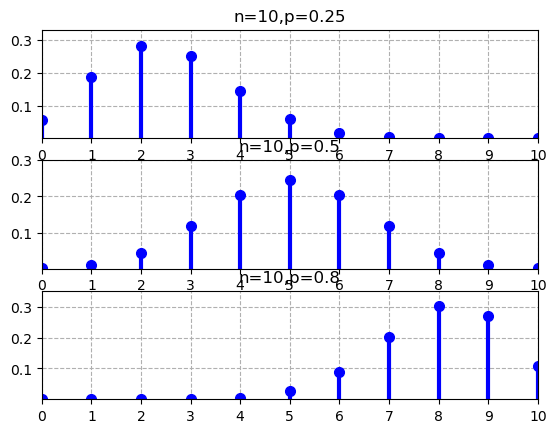

In [49]:
fig, ax = plt.subplots(3, 1)
params = [(10, 0.25), (10, 0.5), (10, 0.8)]
x = range(0, 11)

for i in range(len(params)):
    binom_randomVariable = binom(n=params[i][0], p=params[i][1]) # 这里是构造了一个二项分布对象
    ax[i].set_title('n={},p={}'.format(params[i][0], params[i][1]))
    ax[i].plot(x, binom_randomVariable.pmf(x), 'bo', ms=7) # "bo"是用蓝色圆点来画，ms是点的大小
    ax[i].vlines(x, 0, binom_randomVariable.pmf(x), colors='b', lw=3) # 在每个x处从ymin到ymax画垂直线
    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0, max(binom_randomVariable.pmf(x))+0.05)
    ax[i].set_xticks(x)
    ax[i].set_yticks([0.1, 0.2, 0.3])
    ax[i].grid(ls='--')
    
plt.show()

#### 用RVS方法对二项分布进行采样（等于就是用频率来代替概率，大数定理）

rve0:[3 3 4 ... 4 1 3],len:100000
rve1:[4 6 4 ... 3 3 3],len:100000
rve2:[9 6 5 ... 9 7 8],len:100000


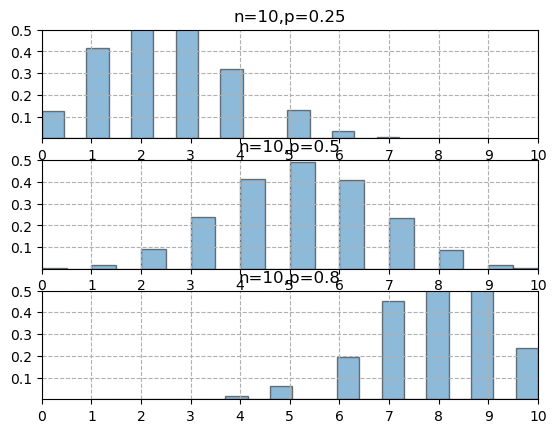

In [59]:
from scipy.stats import binom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1)
params = [(10, 0.25), (10, 0.5), (10, 0.8)]
x = range(0, 11)

for i in range(len(params)):
    binom_randomVariable = binom(n=params[i][0], p=params[i][1]) # 这里是构造了一个二项分布对象
    ax[i].set_title('n={},p={}'.format(params[i][0], params[i][1]))
    rvs = binom_randomVariable.rvs(size=100000)
    
    ax[i].hist(rvs, density=True, bins=20, alpha=0.5, edgecolor='k') # 用直方图来表示，并且用density参数来转化成频率（也就是密度）
    # 参数和ggplot里面其实几乎一模一样
    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0, 0.5)
    ax[i].set_xticks(x)
    ax[i].set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
    ax[i].grid(ls='--')
    
    print('rve{}:{},len:{}'.format(i, rvs, len(rvs)))
    
plt.show()

#### 验证二项分布随机变量的数字特征

In [68]:
from scipy.stats import binom
import numpy as np

binom_randomVariable = binom(n=10, p=0.27)
mean, var, skew, kurt = binom_randomVariable.stats(moments='mvsk') # 这里是计算理论中的均值、方差、偏度、峰度，用的就是自带的stats方法

rvs = binom_randomVariable.rvs(size=5000000)
E_sim = np.mean(rvs)
Sd_sim = np.std(rvs)
Var_sim = Sd_sim * Sd_sim
# 这里就是用5000000次随机抽样证明了和理论计算结果是一样的，也就是大数定理中的频率=概率


print('mean={},Var={}'.format(mean, var))
print('E_sim={},Var_sim={}'.format(E_sim, Var_sim))

mean=2.7,Var=1.971
E_sim=2.6997098,Var_sim=1.9689347957839596


### 几何分布与几何随机变量

#### 画简单的几何分布PMF

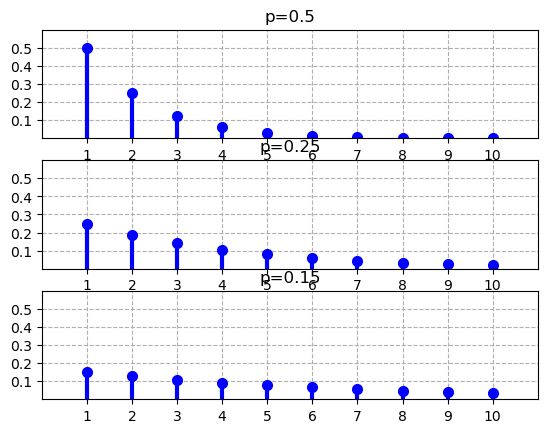

In [74]:
from scipy.stats import geom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1)
params = [0.5, 0.25, 0.15]
x = range(1, 11)

for i in range(len(params)):
    geom_randomVariable = geom(p=params[i])
    
    ax[i].set_title('p={}'.format(params[i]))
    ax[i].plot(x, geom_randomVariable.pmf(x), 'bo', ms=7)
    ax[i].vlines(x, 0, geom_randomVariable.pmf(x), colors='b', lw=3)
    ax[i].set_xlim(0,11)
    ax[i].set_ylim(0, 0.6)
    ax[i].set_xticks(x)
    ax[i].set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
    ax[i].grid(ls='--')
    
    
plt.show()

#### 同样的对几何分布进行采样

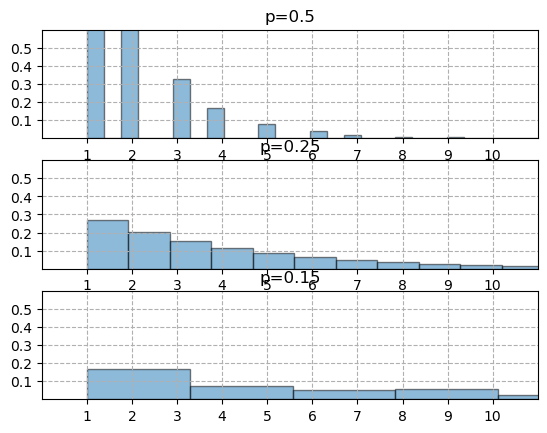

In [79]:
from scipy.stats import geom
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1)
params = [0.5, 0.25, 0.15]
x = range(1, 11)

for i in range(len(params)):
    geom_randomVariable = geom(p=params[i])
    rvs = geom_randomVariable.rvs(size=1000000)
    
    ax[i].set_title('p={}'.format(params[i]))
    ax[i].hist(rvs, density=True, bins=50, edgecolor='k', alpha=0.5)
    ax[i].set_xlim(0,11)
    ax[i].set_ylim(0, 0.6)
    ax[i].set_xticks(x)
    ax[i].set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
    ax[i].grid(ls='--')
    
    
plt.show()

### 泊松分布与泊松随机变量

#### 画PMF图

lambda=10,mean=10.0,var=10.0
lambda=2,mean=2.0,var=2.0


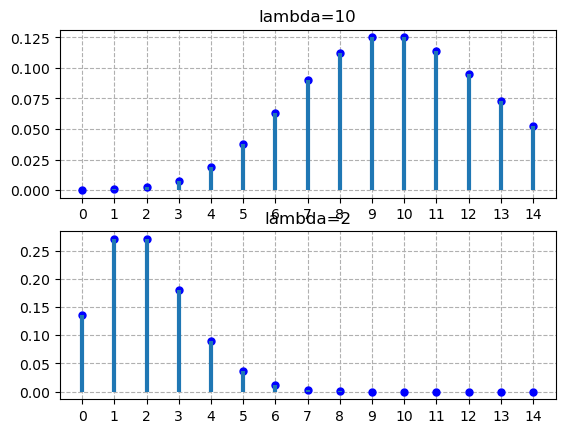

In [93]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1)
x = range(0, 15)
params = [10, 2]

for i in range(len(params)):
    poisson_randomVariable = poisson(params[i])
    mean, var = poisson_randomVariable.stats(moments='mv')
    
    ax[i].plot(x, poisson_randomVariable.pmf(x), 'bo', ms=5)
    ax[i].set_title('lambda={}'.format(params[i]))
    ax[i].vlines(x, 0, poisson_randomVariable.pmf(x), lw=3)
    ax[i].grid(ls='--')
    ax[i].set_xticks(x)
    
    print('lambda={},mean={},var={}'.format(params[i], mean, var))

#### 进行采样

lambda=10,mean=10.0,var=10.0
lambda=10,E_sim=9.98634,Var_sim=10.041313404399999
lambda=15,mean=15.0,var=15.0
lambda=15,E_sim=15.00988,Var_sim=14.923422385599997
lambda=2,mean=2.0,var=2.0
lambda=2,E_sim=2.00205,Var_sim=1.9886857975


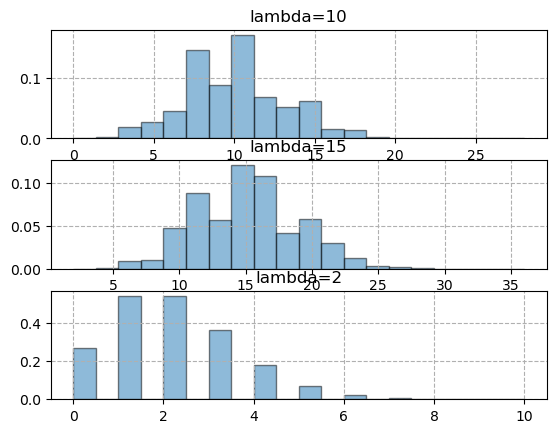

In [48]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(3, 1)
x = range(0, 15)
params = [10, 15, 2]

for i in range(len(params)):
    poisson_randomVariable = poisson(params[i])
    mean, var = poisson_randomVariable.stats(moments='mv')
    rvs = poisson_randomVariable.rvs(size=100000)
    E_sim = np.mean(rvs)
    Var_sim = np.std(rvs) ** 2
    
    ax[i].hist(rvs, bins=20, alpha=0.5, edgecolor='k', density=True)
    ax[i].set_title('lambda={}'.format(params[i]))
    ax[i].grid(ls='--')
    
    
    print('lambda={},mean={},var={}'.format(params[i], mean, var))
    print('lambda={},E_sim={},Var_sim={}'.format(params[i], E_sim, Var_sim))

## 连续型随机变量

### 正态分布以及正态变量

#### 画PDF图

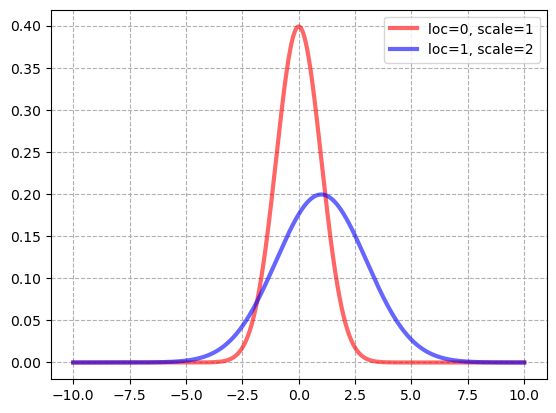

In [12]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1) # 这里其实只画一张图，但是因为两条曲线需要分不同图层来画，所以还是用了subplots
norm_1 = norm(loc=0, scale=1)
norm_2 = norm(loc=1, scale=2)
x = np.linspace(-10, 10, 10000)

ax.plot(x, norm_1.pdf(x), color='red', lw=3, alpha=0.6, label='loc=0, scale=1')
ax.plot(x, norm_2.pdf(x), color='blue', lw=3, alpha=0.6, label='loc=1, scale=2')
ax.legend(loc='best', frameon=True) # loc控制位置，frameon是控制legend要不要浮现在最上层
ax.grid(ls='--')

plt.show()

#### 进行取样

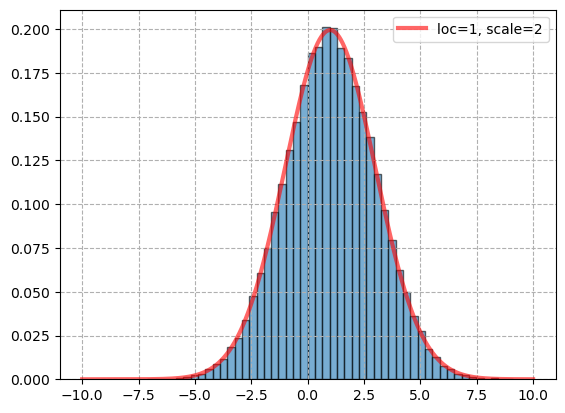

In [15]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)
norm_1 = norm(loc=1, scale=2)
x = np.linspace(-10, 10, 10000)
rvs = norm_1.rvs(size=100000)

ax.plot(x, norm_1.pdf(x), color='red', lw=3, alpha=0.6, label='loc=1, scale=2')
ax.hist(rvs, density=True, alpha=0.6, bins=50, edgecolor='k')
ax.legend(loc='best', frameon=True) # loc控制位置，frameon是控制legend要不要浮现在最上层
ax.grid(ls='--')

plt.show()

### 指数分布与指数随机变量

#### 画PDF图

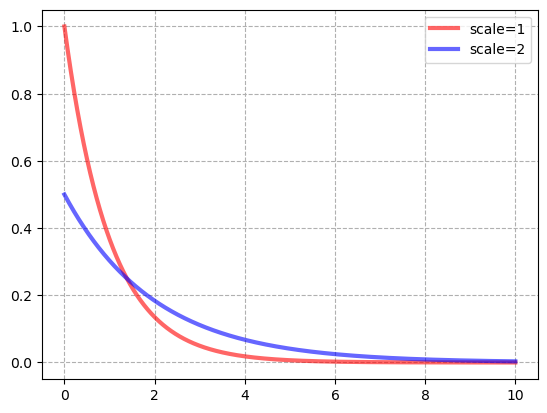

In [20]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)
ex_0 = expon()
ex_1 = expon(scale=2) # scipy在这里设置的参数和数学表达式有点差别，满足以下关系scale = 1 / lambda，默认scale是1，也就是lambda也是1
x = np.linspace(0, 10, 10000)

ax.plot(x, ex_0.pdf(x), color='red', lw=3, alpha=0.6, label='scale=1')
ax.plot(x, ex_1.pdf(x), color='blue', lw=3, alpha=0.6, label='scale=2')
ax.legend(loc='best', frameon=True)
ax.grid(ls='--')

plt.show()

#### 生成采样

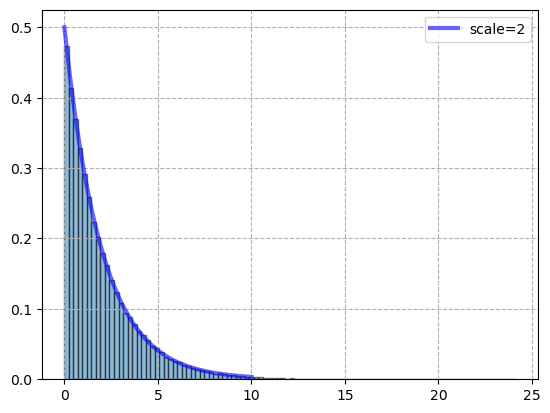

In [24]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)
ex_1 = expon(scale=2) # scipy在这里设置的参数和数学表达式有点差别，满足以下关系scale = 1 / lambda，默认scale是1，也就是lambda也是1
x = np.linspace(0, 10, 10000)
rvs = ex_1.rvs(size=100000)

ax.plot(x, ex_1.pdf(x), color='blue', lw=3, alpha=0.6, label='scale=2')
ax.hist(rvs, density=True, bins=100, alpha=0.5, edgecolor='k')
ax.legend(loc='best', frameon=True)
ax.grid(ls='--')

plt.show()

### 均匀分布以及均匀随机变量

#### PDF图

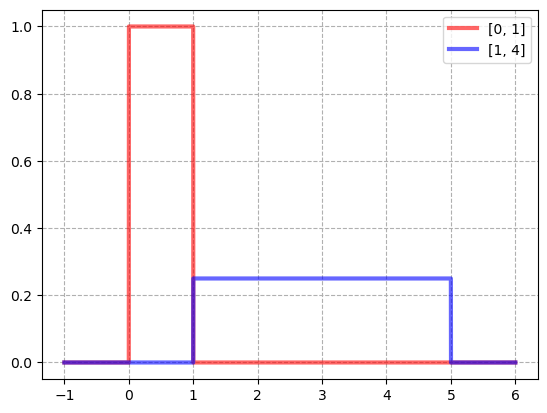

In [27]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)

uni_1 = uniform(loc=1, scale=4) # 这里的loc是start，scale是end
uni_0 = uniform()
x = np.linspace(-1, 6, 10000)

ax.plot(x, uni_0.pdf(x), color='red', lw=3, alpha=0.6, label='[0, 1]')
ax.plot(x, uni_1.pdf(x), color='blue', lw=3, alpha=0.6, label='[1, 4]')
ax.legend(loc='best', frameon=True)
ax.grid(ls='--')

plt.show()

#### 采样

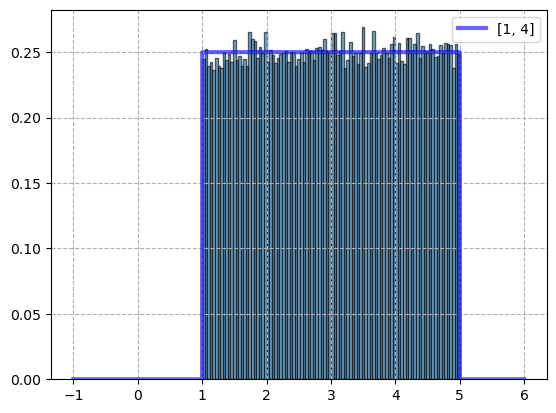

In [30]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)

uni_1 = uniform(loc=1, scale=4) # 这里的loc是start，scale是end
x = np.linspace(-1, 6, 10000)
rvs = uni_1.rvs(size=100000)

ax.plot(x, uni_1.pdf(x), color='blue', lw=3, alpha=0.6, label='[1, 4]')
ax.hist(rvs, density=True, bins=100, alpha=0.6, edgecolor='k')
ax.legend(loc='best', frameon=True)
ax.grid(ls='--')

plt.show()

## 多元分布以及多元随机变量

### 多元正态分布

#### 生成一个二元标准正态分布

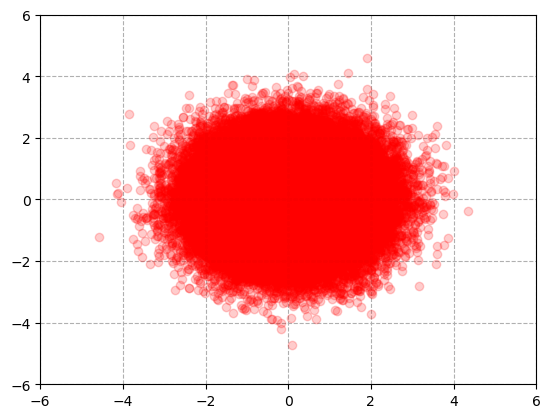

In [25]:
import numpy as np
import matplotlib.pyplot as plt
mean = np.array([0, 0])
conv = np.array([[1,0], 
                [0, 1]])

x, y = np.random.multivariate_normal(mean=mean, cov=conv, size=100000).T
# 注意这里生成多元正态分布的方法，是用随机变量的协方差矩阵来生成的
# 生成出来的结果其实就是一个数组，里面放了坐标，为了画图方便用.T来转置得到分开的XY坐标
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ro', alpha = 0.2)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.grid(ls='--')

#### 生成二元一般正态分布

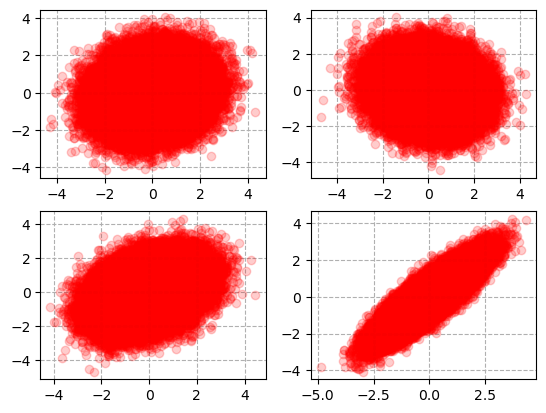

In [57]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)
mean = np.array([0, 0])
conv_1 = np.array([[1,0.13], 
                [0.13, 1]])
conv_2 = np.array([[1,-0.13], 
                [-0.13, 1]])
conv_3 = np.array([[1,0.35], 
                [0.35, 1]])
conv_4 = np.array([[1,0.87], 
                [0.87, 1]])
# 生成了4种不同的协方差矩阵

x1, y1 = np.random.multivariate_normal(mean=mean, cov=conv_1, size=100000).T
x2, y2 = np.random.multivariate_normal(mean=mean, cov=conv_2, size=100000).T
x3, y3 = np.random.multivariate_normal(mean=mean, cov=conv_3, size=100000).T
x4, y4 = np.random.multivariate_normal(mean=mean, cov=conv_4, size=100000).T
plot_lst = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]


ax = ax.ravel() # 最好进行这一步拉平处理，不然用index画图容易报错
for i in range(0, 4):
    ax[i].plot(plot_lst[i][0].tolist(), plot_lst[i][1].tolist(), 'ro', alpha = 0.2)
    ax[i].grid(ls='--')

#### 通过样本计算协方差矩阵

In [66]:
import numpy as np
import matplotlib.pyplot as plt

conv_1 = np.array([[1,0.13], 
                [0.13, 1]])
conv_2 = np.array([[1,-0.13], 
                [-0.13, 1]])

x1, y1 = np.random.multivariate_normal(mean=mean, cov=conv_1, size=100000).T
x2, y2 = np.random.multivariate_normal(mean=mean, cov=conv_2, size=100000).T

s1 = np.vstack((x1, y1)) # 这玩意就是连接，注意只传入一个参数
s2 = np.vstack((x2, y2))

print(np.cov(s1))
print(np.cov(s2))

[[0.99955524 0.12745024]
 [0.12745024 0.99452359]]
[[ 1.00056651 -0.13390506]
 [-0.13390506  1.00048102]]


#### 计算两个随机变量的相关系数

In [68]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

conv_1 = np.array([[1,0.13], 
                [0.13, 1]])

x1, y1 = np.random.multivariate_normal(mean=mean, cov=conv_1, size=100000).T
x2, y2 = x1*10000, y1*10000

s1 = np.vstack((x1, y1)) # 这玩意就是连接，注意只传入一个参数
s2 = np.vstack((x2, y2))

print(np.cov(s1))
print(np.cov(s2))

print(np.corrcoef(s1))
print(np.corrcoef(s2))

[[1.00327617 0.12997568]
 [0.12997568 1.00913419]]
[[1.00327617e+08 1.29975681e+07]
 [1.29975681e+07 1.00913419e+08]]
[[1.         0.12917468]
 [0.12917468 1.        ]]
[[1.         0.12917468]
 [0.12917468 1.        ]]


### 多元高斯分布（其实就是正态分布）

#### 构建不同参数下的二元高斯分布

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3048\4241420110.py:19: RuntimeWarning: covariance is not positive-semidefinite.
  x3, y3 = np.random.multivariate_normal(mean=mean3, cov=conv_3, size=100000).T


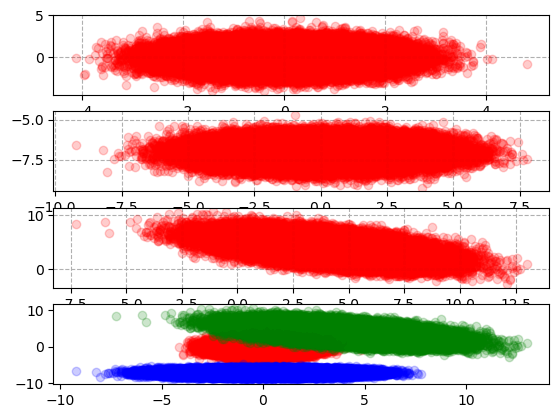

In [8]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(4, 1)
mean1 = np.array([0, 0])
mean2 = np.array([0, -7])
mean3 = np.array([4, 4])
conv_1 = np.array([[1,0], 
                [0, 1]])
conv_2 = np.array([[4,0], 
                [0, 0.25]])
conv_3 = np.array([[4,-3], 
                [-3, 0.25]])


x1, y1 = np.random.multivariate_normal(mean=mean1, cov=conv_1, size=100000).T
x2, y2 = np.random.multivariate_normal(mean=mean2, cov=conv_2, size=100000).T
x3, y3 = np.random.multivariate_normal(mean=mean3, cov=conv_3, size=100000).T
plot_lst = [(x1, y1), (x2, y2), (x3, y3)]


ax = ax.ravel() # 最好进行这一步拉平处理，不然用index画图容易报错
for i in range(0, 3):
    ax[i].plot(plot_lst[i][0].tolist(), plot_lst[i][1].tolist(), 'ro', alpha = 0.2)
    ax[i].grid(ls='--')
    
ax[3].plot(plot_lst[0][0].tolist(), plot_lst[0][1].tolist(), 'ro', alpha = 0.2)
ax[3].plot(plot_lst[1][0].tolist(), plot_lst[1][1].tolist(), 'bo', alpha = 0.2)
ax[3].plot(plot_lst[2][0].tolist(), plot_lst[2][1].tolist(), 'go', alpha = 0.2)